In [1]:
import scanpy as sc
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import sys
sys.path.append('/home/ubuntu/Github/memento/')
import memento
import memento.auxillary.simulate as simulate
import scipy.sparse as sparse


DATA_PATH = '/home/ubuntu/Data/'
CELL_TYPE = 'CD4 T cells - ctrl'

NUM_TRIALS = 20
CAPTURE_EFFICIENCIES = [0.01, 0.05, 0.1, 0.2, 0.3, 0.5, 0.8, 1]
NUMBER_OF_CELLS = [10, 20, 30, 40, 50, 100, 200]

In [6]:
q=0.07

In [7]:
adata = sc.read(DATA_PATH + 'interferon_filtered.h5ad')
adata = adata[adata.obs.cell_type == CELL_TYPE]
data = adata.X.copy()
relative_data = data.toarray()/data.sum(axis=1)

x_param, z_param, Nc, good_idx = simulate.extract_parameters(adata.X, q=q, min_mean=0.01)

/home/ubuntu/anaconda3/envs/mementocxg/lib/python3.11/site-packages/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


In [9]:
x_param[0].shape

(6263,)

In [10]:
x_param[1]

array([9.7235802e-09, 4.9285354e-09, 6.8652184e-07, ..., 3.0476830e-09,
       2.5096519e-08, 6.9261631e-08], dtype=float32)

In [12]:
x_param[0]

array([7.1957336e-05, 1.0512898e-05, 1.9856083e-04, ..., 1.8969877e-05,
       2.1390095e-05, 2.2130340e-04], dtype=float32)

In [15]:
basics_result = pd.read_csv('/home/ubuntu/Data/simulation/variance/test.csv')

In [20]:
basics_result

,Unnamed: 0,mu,delta,variance
0,0,0.585411,1.311206,1.034768
1,1,0.013692,125.158503,0.037156
2,2,1.246841,16.589590,27.037218
3,3,0.286620,7.875985,0.933642
4,4,0.416850,8.917843,1.966450
...,...,...,...,...
6258,6258,0.087227,5.405299,0.128354
6259,6259,0.107357,1.843549,0.128605
6260,6260,0.198675,4.655494,0.382435
6261,6261,0.101532,110.537143,1.241026


In [32]:
scale_factor = (basics_result['mu']/x_param[0]).mean()

In [33]:
scale_factor

8635.110065259412

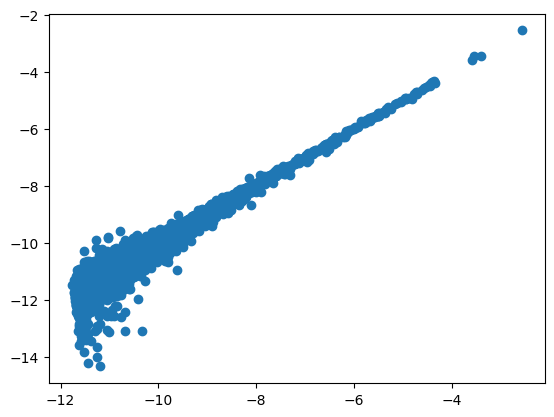

In [39]:
plt.scatter(
    np.log(x_param[0]),
    np.log(basics_result['mu']/scale_factor))

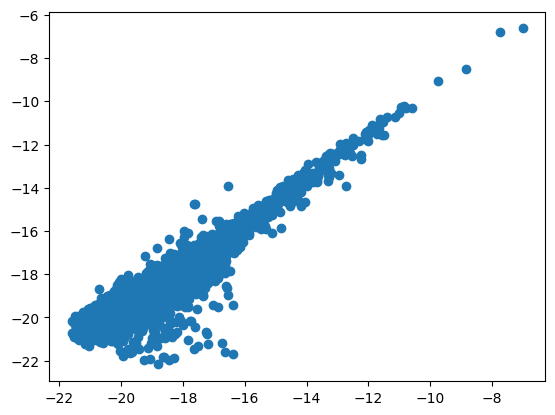

In [37]:
plt.scatter(
    np.log(x_param[1]),
    np.log(basics_result['variance']/scale_factor**2))

In [17]:
basics_result['variance']

0        1.034768
1        0.037156
2       27.037218
3        0.933642
4        1.966450
          ...    
6258     0.128354
6259     0.128605
6260     0.382435
6261     1.241026
6262     6.027754
Name: variance, Length: 6263, dtype: float64